# MAIS202 Kaggle Competition - Fasion MNIST Dataset Classification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imutils
import cv2
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


## Start by Visualizing instances in our data

Shirt


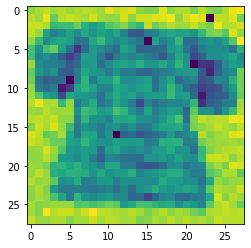

Coat


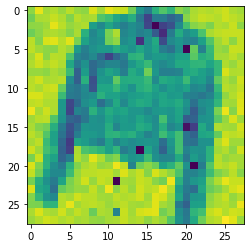

Shirt


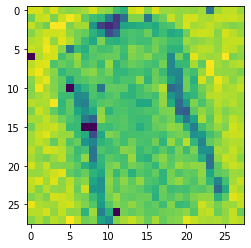

Trouser


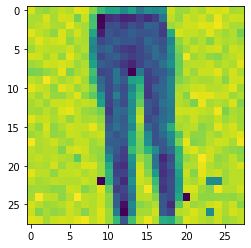

Bag


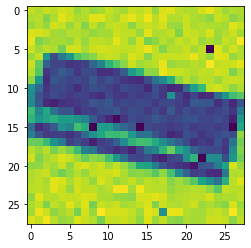

In [53]:
labels = ["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
train_labels = pd.read_csv("train_labels.csv")
train_images = np.load("train_images.npy")
def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

for i in range(5):
    print(labels[train_labels.iloc[i,1]])
    show_image(train_images[i])
    


## Preprocessing of the Images in our dataset

In [54]:
def normalizeImages(train):
  scaler = MinMaxScaler()
  return scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)

def applyBlur(img):
  return cv2.GaussianBlur(img, (3, 3), 0)

def applyDilation(img):
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
  return cv2.dilate(img, kernel, iterations = 1)

def morphTransform(img):
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1))
  return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)


In [55]:
test_images = np.load("test_images.npy")
normalized = normalizeImages(train_images)
normalized2 = normalizeImages(test_images)
def cleanImg(img):
    img = applyBlur(img)
    img = morphTransform(img)
    img = applyDilation(img)
    return img

for i in range(len(normalized)):
    normalized[i] = cleanImg(normalized[i])

for i in range(len(normalized2)):
    normalized2[i] = cleanImg(normalized2[i])

x_test = normalized2
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = normalized
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
y_train = train_labels['label']
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)


## The CNN model

In [49]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

## Fitting the model on our training data
### Please skip this section if you do not want to run training all over again. You can load the model from the next section and use the pre-loaded model after.

In [51]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=15,
          verbose = 1
          )

Epoch 1/15
391/391 [==============================] - 122s 313ms/step - loss: 0.5221 - accuracy: 0.8095
Epoch 2/15
391/391 [==============================] - 127s 326ms/step - loss: 0.4771 - accuracy: 0.8252
Epoch 3/15
391/391 [==============================] - 124s 318ms/step - loss: 0.4523 - accuracy: 0.8342
Epoch 4/15
391/391 [==============================] - 120s 306ms/step - loss: 0.4280 - accuracy: 0.8403
Epoch 5/15
391/391 [==============================] - 125s 320ms/step - loss: 0.4119 - accuracy: 0.8482
Epoch 6/15
391/391 [==============================] - 124s 317ms/step - loss: 0.3909 - accuracy: 0.8541
Epoch 7/15
391/391 [==============================] - 124s 318ms/step - loss: 0.3754 - accuracy: 0.8600
Epoch 8/15
391/391 [==============================] - 127s 324ms/step - loss: 0.3658 - accuracy: 0.8617
Epoch 9/15
391/391 [==============================] - 129s 331ms/step - loss: 0.3491 - accuracy: 0.8689
Epoch 10/15
391/391 [==============================] - 129s 330m

In [57]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


### Run this block of code to load the trained model

In [ ]:
model = keras.models.load_model("my_model")


## Recieving the results and producing a submission csv file

In [61]:
predictions = model.predict(x_test)
def results(predictions):
    best = np.where(predictions == np.amax(predictions))[0][0]
    return best

pred = []
for z in predictions:
    pred.append(results(z))
    
with open("subm2.csv","w") as f:
    f.write("ID,label\n")
    for i in range(len(pred)):
        f.write(f"{i},{pred[i]}\n")